In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


Index(['Unnamed: 0', 'galex_objid', 'sdss_objid', 'u', 'extinction_u',
       'nuv_mag', 'class', 'spectrometric_redshift', 'nuv-u', 'u-g', 'g-r',
       'fuv-nuv', 'fuv-u'],
      dtype='object')


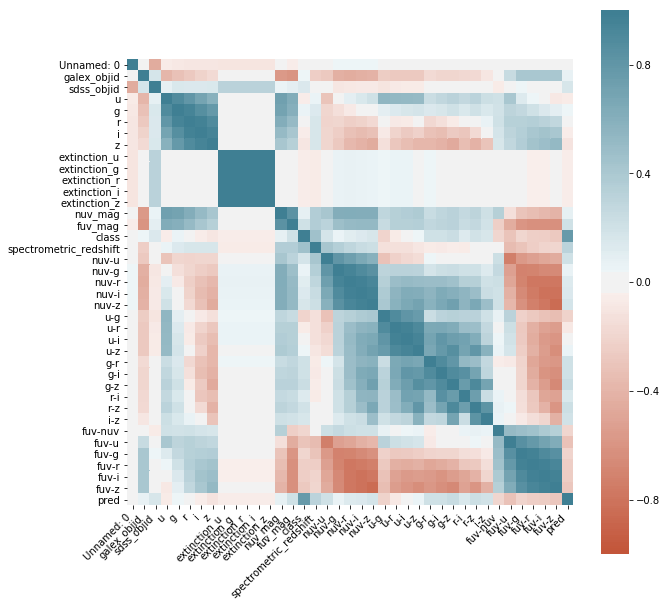

In [4]:
df = pd.read_csv("C:\\Users\\Asus\\Documents\\Sem 5\\ML\\MiniProject1_SectionE_G\\catalog3\\cat3.csv")

# Correlation Matrix
corr = df.corr()
f, ax = plt.subplots(figsize =(10, 10)) 
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

threshold = 0.75
for i in range(len(corr.columns)):
    columns_to_delete = set()
    for j in range(i):
        if((abs(corr.iloc[i,j])>=threshold) and (corr.columns[j] not in columns_to_delete)):
            columns_to_delete.add(corr.columns[i])
            if(corr.columns[i] in df.columns):
                del df[corr.columns[i]]
print(df.columns)

# Covariance Matrix  5,6,7,8,10,12,13
# df.cov()

In [6]:
df = pd.read_csv("cat3.csv")
df.drop(["spectrometric_redshift"], axis = 1, inplace = True)
df.drop(["class"], axis = 1, inplace = True)
weights = []
bias = []
max_feature_value = np.NINF
min_feature_value = np.inf


positive_x = []
negative_x = []
for index, row in df.iterrows():
    if row['pred'] == np.float64(1):
        positive_x.append(row)
    else:
        negative_x.append(row)

d  = {-1:np.array(negative_x), 1:np.array(positive_x)}
for yi in d:
    if np.amax(d[yi])>max_feature_value:
        max_feature_value=np.amax(d[yi])
                
    if np.amin(d[yi])<min_feature_value:
        min_feature_value=np.amin(d[yi])

        
learning_rate = [max_feature_value * 0.1, max_feature_value * 0.01, max_feature_value * 0.001,]
# Svm training
i=1
# global w
# global b
# { ||w||: [w,b] }
length_Wvector = {}
transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]

b_step_size = 2
b_multiple = 5
w_optimum = max_feature_value*0.5
for lrate in learning_rate:

    w = np.array([w_optimum,w_optimum])     
    optimized = False
    while not optimized:
        #b=[-maxvalue to maxvalue] we wanna maximize the b values so check for every b value
        for b in np.arange(-1*(max_feature_value*b_step_size), max_feature_value*b_step_size, lrate*b_multiple):
            for transformation in transforms:  # transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
                w_t = w*transformation

                correctly_classified = True

                # every data point should be correct
                #d=np.reshape(d,(2,))
                for yi in d:
                    for xi in d[yi]:
                        if yi*(np.dot(w_t,xi)+b) < 1:  # we want  yi*(np.dot(w_t,xi)+b) >= 1 for correct classification
                            correctly_classified = False

                if correctly_classified:
                    length_Wvector[np.linalg.norm(w_t)] = [w_t,b] #store w, b for minimum magnitude

        if w[0] < 0:
            optimized = True
        else:
            w = w - lrate

    norms = sorted([n for n in length_Wvector])

    minimum_wlength = length_Wvector[norms[0]]
    w = minimum_wlength[0]
    b = minimum_wlength[1]

    w_optimum = w[0]+lrate*2

ValueError: shapes (2,) and (37,) not aligned: 2 (dim 0) != 37 (dim 0)

NameError: name 'X1' is not defined

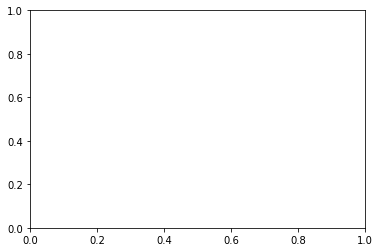

In [7]:
colors = {1:'r',-1:'b'}
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def visualize(data_dict):
       
        
        #[[ax.scatter(x[0],x[1],s=100,color=colors[i]) for x in data_dict[i]] for i in data_dict]
        
        plt.scatter(X1[:,1],X1[:,2],marker='o',c=y)

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane_value(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (min_feature_value*0.9,max_feature_value*1.)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane_value(hyp_x_min, w, b, 1)
        psv2 = hyperplane_value(hyp_x_max, w, b, 1)
        ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane_value(hyp_x_min, w, b, -1)
        nsv2 = hyperplane_value(hyp_x_max, w, b, -1)
        ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane_value(hyp_x_min, w, b, 0)
        db2 = hyperplane_value(hyp_x_max, w, b, 0)
        ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')
        
        plt.axis([-5,10,-12,-1])
        plt.show()
        
visualize(d)


In [2]:
df = pd.read_csv("train.csv.csv")
y = df["class"]
#df.drop(["spectrometric_redshift"], axis = 1, inplace = True)
df.drop(["class"], axis = 1, inplace = True)
df.drop(["pred"], axis = 1, inplace = True)
df.drop(['fuv_mag'], axis = 1, inplace = True)
df.drop(['fuv-nuv'], axis = 1, inplace = True)
df.drop(['fuv-u',], axis = 1, inplace = True)
df.drop(['fuv-g'], axis = 1, inplace = True)
df.drop(['fuv-r'], axis = 1, inplace = True)
df.drop(['fuv-i'], axis = 1, inplace = True)
df.drop(['fuv-z'], axis = 1, inplace = True)
#df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.drop(df.columns[[0]], axis=1, inplace = True)
X=df
#X=np.asarray(X)
#y=np.asarray(y)
print(X.values)
class DecisionTreeRegressor:
  
    def fit(self, X, y, min_leaf = 5):
        self.dtree = Node(X, y, np.array(np.arange(len(y))), min_leaf)
        return self
  
    def predict(self, X):
        return self.dtree.predict(X.values)

class Node:

    def __init__(self, x, y, idxs, min_leaf=5):
        self.x = x 
        self.y = y
        self.idxs = idxs 
        self.min_leaf = min_leaf
        self.row_count = len(idxs)
        self.col_count = x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for c in range(self.col_count): self.find_better_split(c)
        if self.is_leaf: return
        x = self.split_col
        lhs = np.nonzero(x <= self.split)[0]
        rhs = np.nonzero(x > self.split)[0]
        self.lhs = Node(self.x, self.y, self.idxs[lhs], self.min_leaf)
        self.rhs = Node(self.x, self.y, self.idxs[rhs], self.min_leaf)
        
    def find_better_split(self, var_idx):
      
        x = self.x.values[self.idxs, var_idx]

        for r in range(self.row_count):
            lhs = x <= x[r]
            rhs = x > x[r]
            if rhs.sum() < self.min_leaf or lhs.sum() < self.min_leaf: continue

            curr_score = self.find_score(lhs, rhs)
            if curr_score < self.score: 
                self.var_idx = var_idx
                self.score = curr_score
                self.split = x[r]
                
    def find_score(self, lhs, rhs):
        y = self.y[self.idxs]
        lhs_std = y[lhs].std()
        rhs_std = y[rhs].std()
        return lhs_std * lhs.sum() + rhs_std * rhs.sum()
                
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]
                
    @property
    def is_leaf(self): return self.score == float('inf')                

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        node = self.lhs if xi[self.var_idx] <= self.split else self.rhs
        return node.predict_row(xi)
    def predict(self, x):
        return np.array([round(self.predict_row(xi)) for xi in x])

def predict_row(self, xi):
    if self.is_leaf: return self.val
    node = self.lhs if xi[self.var_idx] <= self.split else self.rhs
    return node.predict_row(xi)

regressor = DecisionTreeRegressor().fit(X, y)
preds = regressor.predict(X)

[[ 6.37000000e+18  1.24000000e+18  2.09898109e+01 ...  1.01289749e-01
   2.62527466e-01  1.61237717e-01]
 [ 6.37000000e+18  1.24000000e+18  2.09327698e+01 ... -5.23815155e-02
   4.31697845e-01  4.84079361e-01]
 [ 6.37000000e+18  1.24000000e+18  2.01208878e+01 ... -2.38473892e-01
  -5.98400116e-01 -3.59926224e-01]
 ...
 [ 6.37000000e+18  1.24000000e+18  1.76482754e+01 ... -2.84627914e-01
  -5.52364349e-01 -2.67736435e-01]
 [ 6.37000000e+18  1.24000000e+18  2.03511085e+01 ...  1.52336121e-01
   3.74946594e-01  2.22610474e-01]
 [ 6.37000000e+18  1.24000000e+18  2.02437344e+01 ...  4.00531769e-01
   6.10708237e-01  2.10176468e-01]]


In [3]:
df= pd.read_csv("cat1 - Sheet2.csv")
y = df["class"]
#df.drop(["spectrometric_redshift"], axis = 1, inplace = True)
df.drop(["class"], axis = 1, inplace = True)
df.drop(["pred"], axis = 1, inplace = True)
df.drop(['fuv_mag'], axis = 1, inplace = True)
df.drop(['fuv-nuv'], axis = 1, inplace = True)
df.drop(['fuv-u',], axis = 1, inplace = True)
df.drop(['fuv-g'], axis = 1, inplace = True)
df.drop(['fuv-r'], axis = 1, inplace = True)
df.drop(['fuv-i'], axis = 1, inplace = True)
df.drop(['fuv-z'], axis = 1, inplace = True)
#df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.drop(df.columns[[0]], axis=1, inplace = True)
X_test=df
# print(len(df))
# print(X_test)
pred_test = regressor.predict(X_test)
print(list(pred_test))
print(pred_test[2])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
1


In [4]:
from sklearn.metrics import accuracy_score
#cat=open("cat3.csv")
#tru=list(map(lambda x:int(x.split(",")[15]),cat.readlines()[1:]))
#print(list(y))
print(accuracy_score(list(y), list(pred_test)))
l=0
c=0
for i,j in zip(list(y), list(pred_test)):
    if(i==j):
        l=l+1
        c=c+1
    else:
        l=l+1
print(c/l)

1.0
1.0


In [19]:
# df = pd.read_csv("cat1 - Sheet53.csv")
# y = df["class"]
# df.drop(["spectrometric_redshift"], axis = 1, inplace = True)
# df.drop(["class"], axis = 1, inplace = True)
# df.drop(["pred"], axis = 1, inplace = True)
# df.drop(['fuv_mag'], axis = 1, inplace = True)
# df.drop(['fuv-nuv'], axis = 1, inplace = True)
# df.drop(['fuv-u',], axis = 1, inplace = True)
# df.drop(['fuv-g'], axis = 1, inplace = True)
# df.drop(['fuv-r'], axis = 1, inplace = True)
# df.drop(['fuv-i'], axis = 1, inplace = True)
# df.drop(['fuv-z'], axis = 1, inplace = True)
# #df.drop(['Unnamed: 0'], axis = 1, inplace = True)
# df.drop(df.columns[[0]], axis=1, inplace = True)
df= pd.read_csv("train.csv")
y = df["repl9"]
cols = [4,9,10,13,14,15,16,18,21,22,23,24,25,26,27,30,32,33,34,35,40,41,42,46,47,48,49,53,54,55,56,57,58,59,60,61,64,65,66,67,68,70,72,73,74,75,80,81,82,84,86,87,89,90,93,94,95,96,97,98,99,100,101,104,105]
df.drop(df.columns[cols], axis=1, inplace = True)
X=df
print(X)
print(y)
X=df
#X=np.asarray(X)
#y=np.asarray(y)
print(X.values)
class DecisionTreeRegressor:
  
    def fit(self, X, y, min_leaf = 5):
        self.dtree = Node(X, y, np.array(np.arange(len(y))), min_leaf)
        return self
  
    def predict(self, X):
        return self.dtree.predict(X.values)

class Node:

    def __init__(self, x, y, idxs, min_leaf=5):
        self.x = x 
        self.y = y
        self.idxs = idxs 
        self.min_leaf = min_leaf
        self.row_count = len(idxs)
        self.col_count = x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for c in range(self.col_count): self.find_better_split(c)
        if self.is_leaf: return
        x = self.split_col
        lhs = np.nonzero(x <= self.split)[0]
        rhs = np.nonzero(x > self.split)[0]
        self.lhs = Node(self.x, self.y, self.idxs[lhs], self.min_leaf)
        self.rhs = Node(self.x, self.y, self.idxs[rhs], self.min_leaf)
        
    def find_better_split(self, var_idx):
      
        x = self.x.values[self.idxs, var_idx]

        for r in range(self.row_count):
            lhs = x <= x[r]
            rhs = x > x[r]
            if rhs.sum() < self.min_leaf or lhs.sum() < self.min_leaf: continue

            curr_score = self.find_score(lhs, rhs)
            if curr_score < self.score: 
                self.var_idx = var_idx
                self.score = curr_score
                self.split = x[r]
                
    def find_score(self, lhs, rhs):
        y = self.y[self.idxs]
        lhs_std = y[lhs].std()
        rhs_std = y[rhs].std()
        return lhs_std * lhs.sum() + rhs_std * rhs.sum()
                
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]
                
    @property
    def is_leaf(self): return self.score == float('inf')                

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        node = self.lhs if xi[self.var_idx] <= self.split else self.rhs
        return node.predict_row(xi)
    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

def predict_row(self, xi):
    if self.is_leaf: return self.val
    node = self.lhs if xi[self.var_idx] <= self.split else self.rhs
    return node.predict_row(xi)

regressor = DecisionTreeRegressor().fit(X, y)
preds = regressor.predict(X)

      usr  sys  idl  wai       read        writ      recv      send     int  \
0       4    1   87    8   723000.0   1601000.0       0.0       0.0  2748.0   
1       0    0  100    0        0.0         0.0      66.0       0.0   278.0   
2       0    0  100    0        0.0         0.0       0.0       0.0   194.0   
3       0    0  100    0        0.0     28000.0       0.0       0.0   261.0   
4       0    0  100    0        0.0     32000.0       0.0       0.0   437.0   
5       0    0   99    0        0.0         0.0     722.0    1806.0   521.0   
6       0    0  100    0        0.0    152000.0     358.0     388.0   279.0   
7       0    0  100    0        0.0         0.0       0.0       0.0   288.0   
8       0    0  100    0        0.0     28000.0       0.0       0.0   235.0   
9       0    0  100    0        0.0         0.0       0.0       0.0   347.0   
10      0    0  100    0        0.0         0.0     196.0     130.0   230.0   
11      0    0  100    0        0.0     56000.0     

In [20]:
# df= pd.read_csv("cat1 - Sheet2.csv")
# y = df["class"]
# df.drop(["spectrometric_redshift"], axis = 1, inplace = True)
# df.drop(["class"], axis = 1, inplace = True)
# df.drop(["pred"], axis = 1, inplace = True)
# df.drop(['fuv_mag'], axis = 1, inplace = True)
# df.drop(['fuv-nuv'], axis = 1, inplace = True)
# df.drop(['fuv-u',], axis = 1, inplace = True)
# df.drop(['fuv-g'], axis = 1, inplace = True)
# df.drop(['fuv-r'], axis = 1, inplace = True)
# df.drop(['fuv-i'], axis = 1, inplace = True)
# df.drop(['fuv-z'], axis = 1, inplace = True)
#df.drop(['Unnamed: 0'], axis = 1, inplace = True)
#df.drop(df.columns[[0]], axis=1, inplace = True)
df1= pd.read_csv("test.csv")
y_test = df1["repl8"]
cols = [4,9,10,13,14,15,16,18,21,22,23,24,25,26,27,30,32,33,34,35,40,41,42,46,47,48,49,53,54,55,56,57,58,59,60,61,64,65,66,67,68,70,72,73,74,75,80,81,82,84,86,87,89,90,93,94,95,96,97,98,99,100,101,104,105]
df1.drop(df1.columns[cols], axis=1, inplace = True)
X=df1
X_test=df1
# print(len(df))
# print(X_test)
pred_test = regressor.predict(X_test)
print(list(pred_test))
print(pred_test[2])
print(y_test)

[68000.0, 72600.0, 72600.0, 68000.0, 54111.11111111111, 68000.0, 54111.11111111111, 54111.11111111111, 54111.11111111111, 68000.0, 68000.0, 72600.0, 61125.0, 54111.11111111111, 68000.0, 72600.0, 54111.11111111111, 72600.0, 68000.0, 54111.11111111111, 68000.0, 54111.11111111111, 68000.0, 72600.0, 68000.0, 68000.0, 72600.0, 72600.0, 68000.0, 54111.11111111111, 68000.0, 61125.0, 54111.11111111111, 72600.0, 68000.0, 54111.11111111111, 54111.11111111111, 68000.0, 61125.0, 68000.0, 54111.11111111111, 68000.0, 54111.11111111111, 72600.0, 68000.0, 72600.0, 68000.0, 54111.11111111111, 54111.11111111111, 68000.0, 54111.11111111111, 54111.11111111111, 68000.0, 54111.11111111111, 54111.11111111111, 68000.0, 61125.0, 72600.0, 68000.0, 54111.11111111111, 61125.0, 68000.0, 54111.11111111111, 61125.0, 68000.0, 61125.0, 54111.11111111111, 68000.0, 68000.0, 72600.0, 68000.0, 72600.0, 68000.0, 54111.11111111111, 54111.11111111111, 68000.0, 54111.11111111111, 68000.0, 54111.11111111111, 68000.0, 68000.0, 

In [9]:
l=0
c=0
for i,j in zip(list(y), list(pred_test)):
    if(i==j and i==1):
        l=l+1
        c=c+1
    elif(i!=j and i==1):
        l=l+1
print("Accuracy of Quasars: ", c/l)


Accuracy of Quasars:  0.972972972972973


      usr  sys  idl  wai       read        writ      recv      send      int  \
0       4    1   87    8   723000.0   1601000.0       0.0       0.0   2748.0   
1       0    0  100    0        0.0         0.0      66.0       0.0    278.0   
2       0    0  100    0        0.0         0.0       0.0       0.0    194.0   
3       0    0  100    0        0.0     28000.0       0.0       0.0    261.0   
4       0    0  100    0        0.0     32000.0       0.0       0.0    437.0   
5       0    0   99    0        0.0         0.0     722.0    1806.0    521.0   
6       0    0  100    0        0.0    152000.0     358.0     388.0    279.0   
7       0    0  100    0        0.0         0.0       0.0       0.0    288.0   
8       0    0  100    0        0.0     28000.0       0.0       0.0    235.0   
9       0    0  100    0        0.0         0.0       0.0       0.0    347.0   
10      0    0  100    0        0.0         0.0     196.0     130.0    230.0   
11      0    0  100    0        0.0     

In [1]:
import pandas as pd
import numpy as np
df= pd.read_csv("dataset27018.csv")
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
df = shuffle(df)
train, test = train_test_split(df, test_size=0.2)
y = train[train.columns[14]]
cols = [4,9,10,13,14,15,16,18,21,22,23,24,25,26,27,30,32,33,34,35,40,41,42,46,47,48,49,53,54,55,56,57,58,59,60,61,64,65,66,67,68,70,72,73,74,75,80,81,82,84,86,87,89,90,93,94,95,96,97,98,99,100,101,104,105]
train.drop(train.columns[cols], axis=1, inplace = True)
X=train
print(X)
print(y)
#X=np.asarray(X)
#y=np.asarray(y)
#print(X.values)
class DecisionTreeRegressor:
  
    def fit(self, X, y, min_leaf = 12):
        self.dtree = Node(X, y, np.array(np.arange(len(y))), min_leaf)
        return self
  
    def predict(self, X):
        return self.dtree.predict(X.values)

class Node:

    def __init__(self, x, y, idxs, min_leaf=5):
        self.x = x 
        self.y = y
        self.idxs = idxs 
        self.min_leaf = min_leaf
        self.row_count = len(idxs)
        self.col_count = x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for c in range(self.col_count): self.find_better_split(c)
        if self.is_leaf: return
        x = self.split_col
        lhs = np.nonzero(x <= self.split)[0]
        rhs = np.nonzero(x > self.split)[0]
        self.lhs = Node(self.x, self.y, self.idxs[lhs], self.min_leaf)
        self.rhs = Node(self.x, self.y, self.idxs[rhs], self.min_leaf)
        
    def find_better_split(self, var_idx):
      
        x = self.x.values[self.idxs, var_idx]

        for r in range(self.row_count):
            lhs = x <= x[r]
            rhs = x > x[r]
            if rhs.sum() < self.min_leaf or lhs.sum() < self.min_leaf: continue

            curr_score = self.find_score(lhs, rhs)
            if curr_score < self.score: 
                self.var_idx = var_idx
                self.score = curr_score
                self.split = x[r]
                
    def find_score(self, lhs, rhs):
        y = self.y[self.idxs]
        lhs_std = y[lhs].std()
        rhs_std = y[rhs].std()
        return lhs_std * lhs.sum() + rhs_std * rhs.sum()
                
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]
                
    @property
    def is_leaf(self): return self.score == float('inf')                

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        node = self.lhs if xi[self.var_idx] <= self.split else self.rhs
        return node.predict_row(xi)
    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

def predict_row(self, xi):
    if self.is_leaf: return self.val
    node = self.lhs if xi[self.var_idx] <= self.split else self.rhs
    return node.predict_row(xi)

regressor = DecisionTreeRegressor().fit(X, y)
preds = regressor.predict(X)

C:\Users\Vishnu S Murali\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


      usr  sys  idl  wai        read        writ      recv       send  \
3773   53   10   10   27    560000.0  16000000.0  169000.0   282000.0   
226    19    6    0   75  10000000.0    760000.0  191000.0   394000.0   
2238   29    8    9   54   1992000.0  10000000.0  146000.0   273000.0   
2768   28   10    5   58   1632000.0  12000000.0  148000.0   316000.0   
3565   58    8    5   29   1504000.0  14000000.0  154000.0   267000.0   
308    12    5    0   83  12000000.0    540000.0  198000.0   436000.0   
2245   33    9    3   56   3796000.0   2284000.0  161000.0   294000.0   
3891   31   19    4   46   2312000.0   9868000.0  123000.0   279000.0   
183    19    5    5   71   7728000.0   6560000.0   52000.0   133000.0   
4083   51   13    6   30    984000.0  14000000.0  146000.0   246000.0   
4775   14    1   40   44         0.0  19000000.0       0.0        0.0   
1375   33    9    2   56  10000000.0  13000000.0  411000.0   547000.0   
2842   27    8   13   51    752000.0  15000000.0   

C:\Users\Vishnu S Murali\Anaconda3\lib\site-packages\pandas\core\series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [2]:
cols = [4,9,10,13,14,15,16,18,21,22,23,24,25,26,27,30,32,33,34,35,40,41,42,46,47,48,49,53,54,55,56,57,58,59,60,61,64,65,66,67,68,70,72,73,74,75,80,81,82,84,86,87,89,90,93,94,95,96,97,98,99,100,101,104,105]
y_test = test[test.columns[14]]
test.drop(test.columns[cols], axis=1, inplace = True)
X_test=test
pred_test = regressor.predict(X_test)
print(list(pred_test))
print(pred_test[2])
print(y_test)

[2526.315789473684, 4777.777777777777, 4600.0, 1230.7692307692307, 1916.6666666666667, 4000.0, 1800.0, 2700.0, 2055.5555555555557, 1666.6666666666667, 3200.0, 2722.222222222222, 2562.5, 3000.0, 3888.8888888888887, 5000.0, 3000.0, 2214.285714285714, 4400.0, 3500.0, 2500.0, 2916.6666666666665, 3000.0, 1714.2857142857142, 1769.2307692307693, 2142.8571428571427, 2888.8888888888887, 3166.6666666666665, 4888.888888888889, 4363.636363636364, 3000.0, 2750.0, 4636.363636363636, 4818.181818181818, 2272.7272727272725, 4625.0, 4062.5, 2222.222222222222, 2105.2631578947367, 2500.0, 1333.3333333333333, 1428.5714285714287, 3083.3333333333335, 5090.909090909091, 2375.0, 2055.5555555555557, 2500.0, 1916.6666666666667, 2545.4545454545455, 1777.7777777777778, 2300.0, 2454.5454545454545, 2285.714285714286, 1666.6666666666667, 2142.8571428571427, 2100.0, 1800.0, 1375.0, 1250.0, 1800.0, 5090.909090909091, 1800.0, 1000.0, 3214.285714285714, 2388.8888888888887, 3666.6666666666665, 2411.764705882353, 1411.7647

C:\Users\Vishnu S Murali\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [3]:
print(list(pred_test))
print(list(y_test))

[2526.315789473684, 4777.777777777777, 4600.0, 1230.7692307692307, 1916.6666666666667, 4000.0, 1800.0, 2700.0, 2055.5555555555557, 1666.6666666666667, 3200.0, 2722.222222222222, 2562.5, 3000.0, 3888.8888888888887, 5000.0, 3000.0, 2214.285714285714, 4400.0, 3500.0, 2500.0, 2916.6666666666665, 3000.0, 1714.2857142857142, 1769.2307692307693, 2142.8571428571427, 2888.8888888888887, 3166.6666666666665, 4888.888888888889, 4363.636363636364, 3000.0, 2750.0, 4636.363636363636, 4818.181818181818, 2272.7272727272725, 4625.0, 4062.5, 2222.222222222222, 2105.2631578947367, 2500.0, 1333.3333333333333, 1428.5714285714287, 3083.3333333333335, 5090.909090909091, 2375.0, 2055.5555555555557, 2500.0, 1916.6666666666667, 2545.4545454545455, 1777.7777777777778, 2300.0, 2454.5454545454545, 2285.714285714286, 1666.6666666666667, 2142.8571428571427, 2100.0, 1800.0, 1375.0, 1250.0, 1800.0, 5090.909090909091, 1800.0, 1000.0, 3214.285714285714, 2388.8888888888887, 3666.6666666666665, 2411.764705882353, 1411.7647

In [4]:
import math
test=open("testdata1true18.csv","w")
def rmse(pred,y):
    res=0
    for i,j in zip(pred,y):
        res=res+(i-j)**2
        test.write(str(i)+","+str(j)+"\n")
    return math.sqrt(res/len(pred))
print(rmse(list(pred_test)[1:],list(y_test)[1:]))

2265.2178069218935


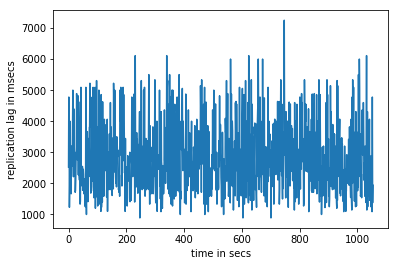

<function matplotlib.pyplot.show(*args, **kw)>

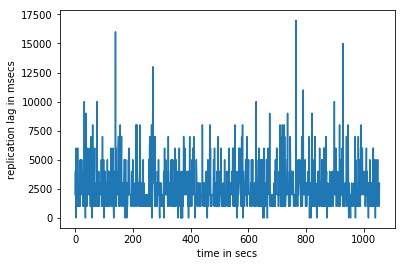

In [10]:
plt.plot(list(pred_test))
plt.xlabel("time in secs")
plt.ylabel("replication lag in msecs")
plt.show()
plt.plot(list(y_test))
plt.xlabel("time in secs")
plt.ylabel("replication lag in msecs")
plt.show